## Beyond the Menu : A Zomato Data Story

In today's competitive food industry, data-driven insights play a crucial role in understanding customer preferences, market trends, and business growth opportunities. This project aims to perform Exploratory Data Analysis (EDA) on the Zomato dataset, uncovering key patterns related to restaurant distribution, customer ratings, and competitive landscapes across various locations.


The Zomato Dataset contains the following variables:<br>

• Restaurant Id: Unique id of every restaurant across various cities of the world<br>
• Restaurant Name: Name of the restaurant<br>
• Country Code: Country in which restaurant is located<br>
• City: City in which restaurant is located<br>
•Address: Address of the restaurant<br>
• Locality: Location in the city<br>
• Locality Verbose: Detailed description of the locality<br>
• Longitude: Longitude coordinate of the restaurant's location<br>
• Latitude: Latitude coordinate of the restaurant's location<br>
• Cuisines: Cuisines offered by the restaurant<br>
• Average Cost for two: Cost for two people in different currencies<br>
• Currency: Currency of the country<br>
• Has Table booking: yes/no<br>
• Has Online delivery: yes/ no<br>
• Is delivering: yes/ no<br>
• Switch to order menu: yes/no<br>
• Price range: range of price of food<br>
• Aggregate Rating: Average rating out of 5<br>
• Rating color: depending upon the average rating color<br>
• Rating text: text on the basis of rating of rating<br>
• Votes: Number of ratings casted by people<br>


  

#### Step 1: Data Collection and Loading Data

Importing Libraries

In [229]:
# Importing the required Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import folium
import squarify
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import warnings

warnings.filterwarnings('ignore')

Loading the Data 

In [230]:
# Loading the zomato data

df = pd.read_csv("zomato.csv", encoding='latin1')
df_country = pd.read_excel("Country-Code.xlsx")

#### Step 2: Understanding the Dataset Structure

In [231]:
# Reading the top rows of the Dataset

df.head(10)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [232]:
# Reading the bottom rows of the Dataset

df.tail(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9541,5905215,Emirgan Sí_tiô,208,ÛÁstanbul,"Emirgan Mahallesi, SakÛ±p SabancÛ± Caddesi, No...",Emirgí¢n,"Emirgí¢n, ÛÁstanbul",29.056620,41.104969,"Restaurant Cafe, Turkish, Desserts",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,877
9542,5926979,Leman Kí_ltí_r,208,ÛÁstanbul,"CaferaÛôa Mahallesi, Neôet í_mer Sokak, No 9/...",KadÛ±kí_y Merkez,"KadÛ±kí_y Merkez, ÛÁstanbul",29.022805,40.989705,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,3,3.7,Yellow,Good,506
9543,5916085,Dem Karakí_y,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, Hoca Ta...",Karakí_y,"Karakí_y, ÛÁstanbul",28.978237,41.024633,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761
9544,5915547,Karakí_y Gí_llí_oÛôlu,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977636,41.022904,"Desserts, Bí_rek",...,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305
9545,5915054,Baltazar,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, KÛ±lÛ±í...",Karakí_y,"Karakí_y, ÛÁstanbul",28.981103,41.025785,"Burger, Izgara",...,Turkish Lira(TL),No,No,No,No,3,4.3,Green,Very Good,870
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [233]:
# Findng the total rows and columns in the dataset

df.shape

(9551, 21)

In [234]:
# Findng the column names of the dataset

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [235]:
# Finding the summary statistics about dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [236]:
# Finding the details of different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Step 3: Diagnosing and handling the missing values 

In [237]:
# Finding the null values in dataset

df.isnull().sum().sort_values(ascending = False)

Cuisines                9
Restaurant Name         0
Country Code            0
City                    0
Restaurant ID           0
Address                 0
Locality                0
Longitude               0
Locality Verbose        0
Latitude                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

As checked there are 9 missing values in Cuisines column of the dataset .  

Handling the missing values 

In [238]:
# Droping the rows with nulll values

df_cleaned = df.dropna()

# Finding the shape of dataset without null values
df_cleaned.shape

(9542, 21)

#### Step 4: Diagnosing and handling the duplicate values 

In [239]:
# Finding the duplicated data

df_cleaned.duplicated().sum()

np.int64(0)

As checked there are no duplicate values in the dataset

#### Step 5: Exploring the Data Distribution

In [240]:
# Check Data Types of the columns to determine which columns are numerical and which are categorical.
df_cleaned.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [241]:
# Exploring the unique values in the categorical columns
categorical_val = df_cleaned[["Restaurant Name","City","Address","Locality","Locality Verbose","Cuisines","Currency","Has Table booking",
                      "Has Online delivery","Is delivering now","Switch to order menu","Rating color","Rating text"]]

for i in categorical_val:
    print(f"Unique values in '{i}' are: ")
    print(df_cleaned[i].value_counts(),'\n')
    
    


Unique values in 'Restaurant Name' are: 
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
NamlÛ± Gurme         1
Ceviz AÛôacÛ±        1
Huqqa                1
Aôôk Kahve         1
The Big Mouth        1
Name: count, Length: 7437, dtype: int64 

Unique values in 'City' are: 
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
             ... 
Inverloch       1
Mohali          1
Panchkula       1
Bandung         1
Randburg        1
Name: count, Length: 140, dtype: int64 

Unique values in 'Address' are: 
Address
Sector 41, Noida                                                        11
Dilli Haat, INA, New Delhi                                              11
Greater Kailash (GK) 1, New Delhi                                       10
The Imperial, Janpath, New Delhi                                         9
HUDA Market, Sector 56, Gurgaon  

Visualization for Categorical Data

Insight 1 : How many restaurants have online order facility.

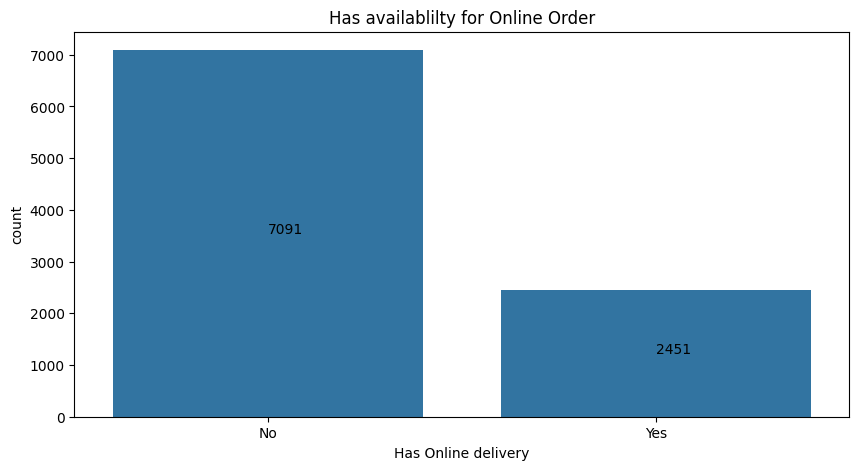

In [242]:
# Visualization of "Has Online delivery" column to get insight ofhow many restaurants have got the online order facility .
plt.figure(figsize=(10,5))
ax= sns.countplot(x=df_cleaned["Has Online delivery"])

plt.title("Has availablilty for Online Order")

# Labeling the bars in countplot
for p in ax.patches:
    ax.text((p.get_x()+p.get_width()/2), p.get_height()/2, f'{int(p.get_height())}')

plt.show()

As we can see about ~7100 of  restaurants do not have the facilty of online order and about ~2450 restaurants have the facilty of online order .

<br>
Insight 2 : Which of the top 10 cities having the most number of the  restaurants?

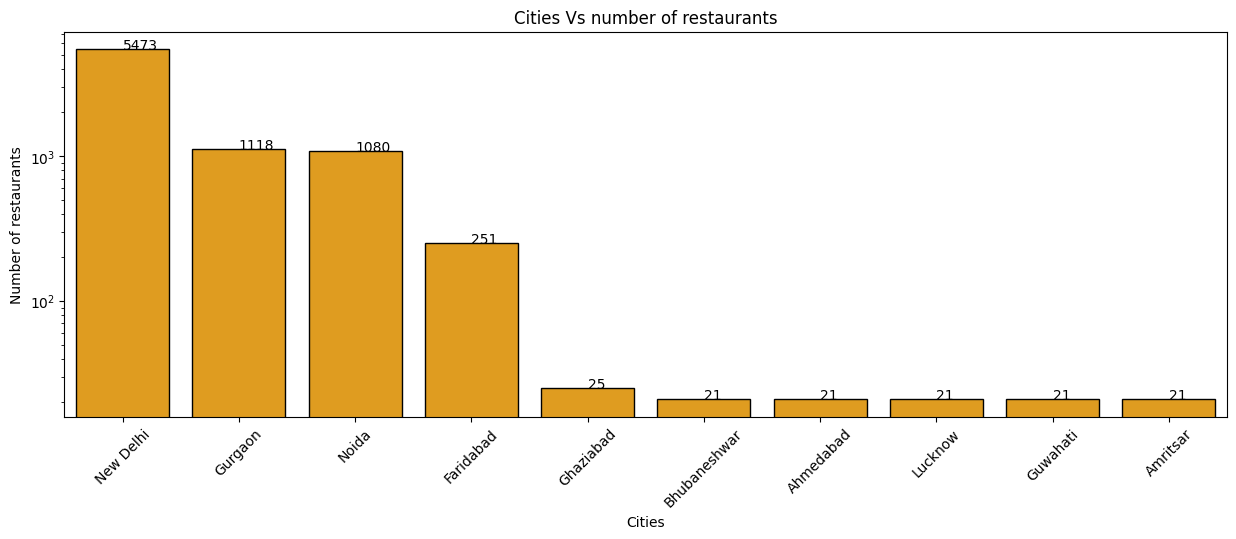

In [ ]:
# Getting the total count of restaurants of each city.
city_restaurant_count= df_cleaned['City'].value_counts(ascending= False).head(10)

# Ploting the barplot
plt.figure(figsize=(15,5))
ax= sns.barplot(city_restaurant_count,color= 'orange',edgecolor='black')

# Customizing the barplot
plt.xticks(rotation = 45)
plt.title("Cities Vs number of restaurants")
plt.xlabel("Cities")
plt.ylabel("Number of restaurants")
plt.yscale("log")


# Adding label to the bars of the barchart.
for p in ax.patches:
    plt.text(p.get_x()+p.get_width()/2 , p.get_height(),int(p.get_height()))

# Showing the barplot
plt.show()


As per the above analysis we can see that New delhi has maximum number of restaurants counting for 5473 restaurants followed by urgaon with 1118 restaurants and Noida with 1080 restaurants .

<br>
Insight 3 : Get the localities with most number of restaurants .

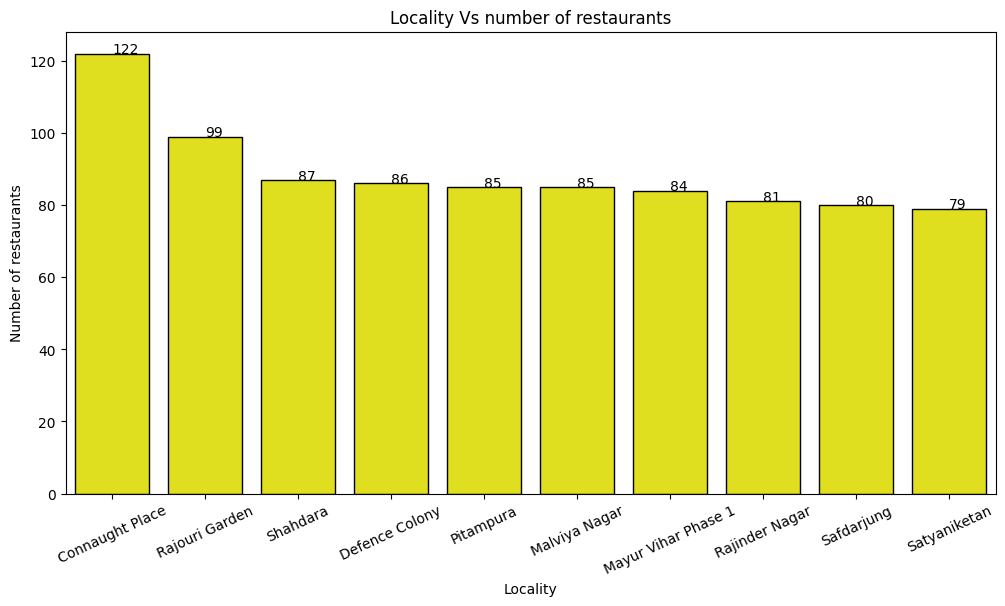

In [244]:
# Getting localities with top most number of restaurants
restaurants_in_localities = df_cleaned["Locality"].value_counts(ascending = False).head(10)

# Ploting the bargraph
plt.figure(figsize=(12,6))
ax = sns.barplot(restaurants_in_localities, color='yellow',edgecolor = 'black')

# Customization of Bargraph
plt.title("Locality Vs number of restaurants")
plt.xlabel("Locality")
plt.ylabel("Number of restaurants")
plt.xticks(rotation = 25)

# Marking the bars in bargraph
for p in ax.patches:
    plt.text(p.get_x() + p.get_width()/2 , p.get_height() , int(p.get_height())) 


# Showing the bargraph
plt.show()


From the above analysis we can see that "Connaught Place" is the most famous locality for restaurants , having 122 restaurants .This is followed by "Rajouri Garden" and "Shahdara" having 99 and 87 restaurants respectively .

<br>
Insight 4: Find the most famous Cuisines .

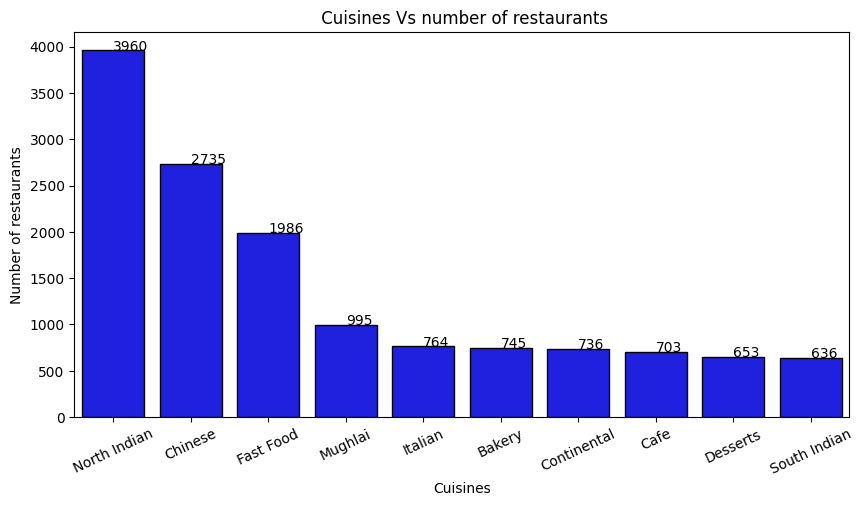

In [245]:
# Getting the top most Cuisines
all_cuisines = df_cleaned['Cuisines'].str.split(",").explode()

all_cuisines_normalised = all_cuisines.str.strip().str.title()   # Normalizing the Cuisines names 

cuisines_count = all_cuisines_normalised.value_counts().head(10)

# Ploting the bargraph
plt.figure(figsize=(10,5))
ax = sns.barplot(cuisines_count , color = "blue" , edgecolor = 'black')

# Marking the bars in bargraph
for p in ax.patches:
    plt.text(p.get_x()+ p.get_width()/2, p.get_height() , int(p.get_height()))

# Customization of Bargraph
plt.title(" Cuisines Vs number of restaurants")
plt.xlabel("Cuisines")
plt.ylabel("Number of restaurants")
plt.xticks(rotation = 25)

# Showing the bargraph
plt.show()


From the above analysis we can see that "North Indian" is the most famous Cuisine . Followed by "Chinese" and "Fast Food".

<br>
Insight 5: Find the number of restaurants who offer table booking facilities .

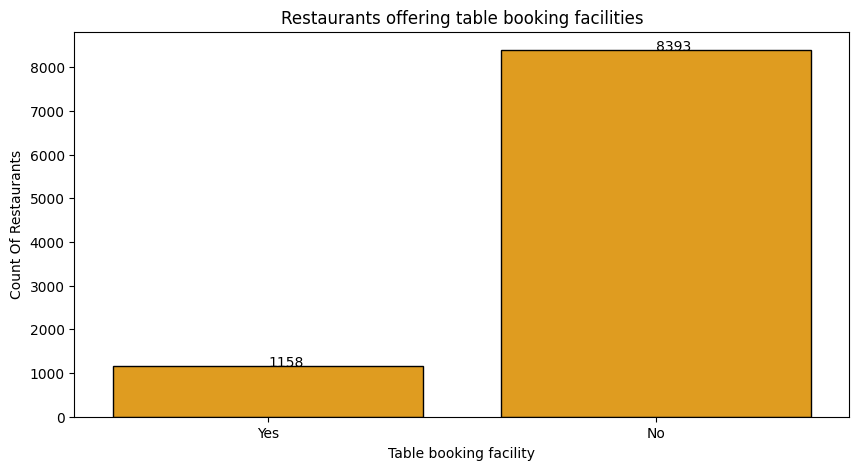

In [246]:
# Counting the occurance of "Has Table booking"
table_booking_count = df['Has Table booking'].value_counts(ascending= True)

# Creating the plot
plt.figure(figsize=(10,5))
ax = sns.barplot( table_booking_count,color = "orange" , edgecolor = "black" )

# Customizing the bargraph
plt.title("Restaurants offering table booking facilities")
plt.xlabel("Table booking facility")
plt.ylabel("Count Of Restaurants")

# Adding  bar labels
for p in ax.patches:
    plt.text(p.get_x()+p.get_width()/2 , p.get_height(), int(p.get_height()))

# Showing the barplot
plt.show()

As per the above analysis most of the restaurants do not offer "Table booking" facilities . As we can see only 1158 restaurants offer table booking facility whereas 8393 restaurantsdo not offer the facility . 

<br>
Insight 6 : Find the restaurants that offer Online Delivery .

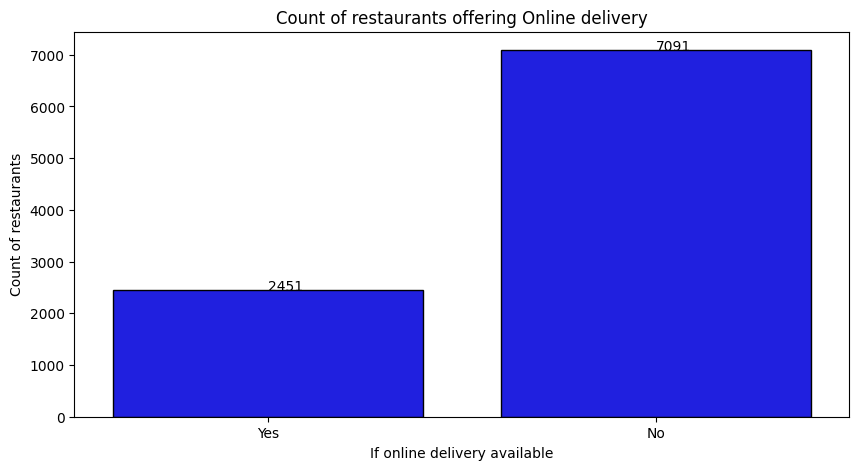

In [247]:
# Getting the count of online delivery restaurants  
Has_Online_delivery = df_cleaned["Has Online delivery"].value_counts(ascending= True)

# Ploting the graph 
plt.figure(figsize=(10 , 5))
ax = sns.barplot(Has_Online_delivery , color = "blue",  edgecolor = "black")

# Customizing the plot 
plt.title("Count of restaurants offering Online delivery")
plt.xlabel("If online delivery available")
plt.ylabel("Count of restaurants")

# Marking the bars 
for p in ax.patches:
    plt.text(p.get_x()+ p.get_width()/2 , p.get_height() , int(p.get_height()) )

# Showing the graph 
plt.show()


As per the above analysis it is evident that approximately 7,091 restaurants do not provide an "Online Delivery" service, whereas only around   2,451 establishments offer this option.


<br>
Insight 7 : Find the restaurants that offer delivery or dine-in  .

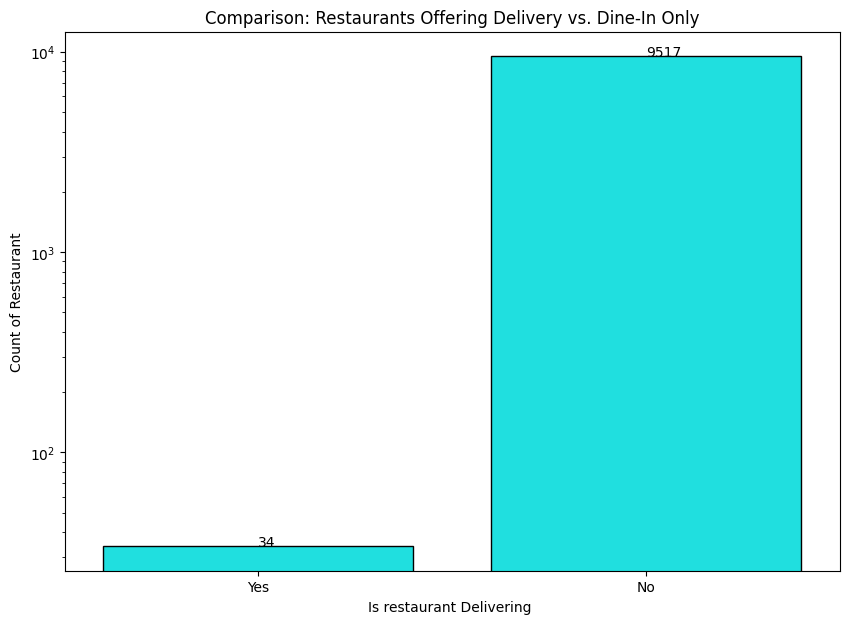

In [256]:
# Getting the restaurants that offer delivery now
Is_restaurants_delivering_now = df["Is delivering now"].value_counts(ascending= True)

# Ploting the graph 
plt.figure(figsize= (10 , 7 ))
ax = sns.barplot(Is_restaurants_delivering_now , color = "cyan", edgecolor = "black")

# Customizing the graph 
plt.title("Comparison: Restaurants Offering Delivery vs. Dine-In Only")
plt.xlabel("Is restaurant Delivering ")
plt.ylabel("Count of Restaurant")
plt.yscale("log")

# Marking the bars
for p in ax.patches:
    plt.text(p.get_x()+p.get_width()/2 , p.get_height() , int(p.get_height()) )

# Showing the graph
plt.show()



According to the above analysis, it is evident that only a small fraction of restaurants, precisely 34, exclusively offer home delivery, whereas the majority, totaling 9,517, provide solely a dine-in experience.

<br>
Insight 8 : How are the restaurants rated ?

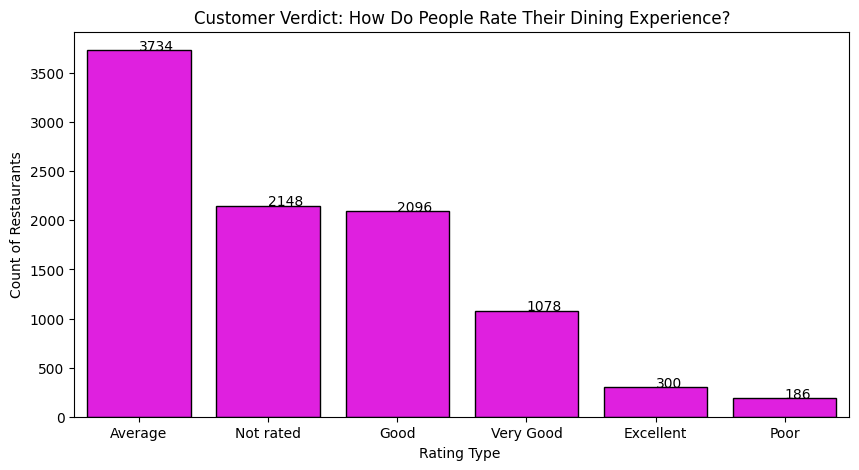

In [249]:
# Finding how are the restaurants rated
How_are_restaurants_rated = df_cleaned["Rating text"].value_counts(ascending= False)

# Ploting a graph 
plt.figure(figsize=(10, 5))
ax = sns.barplot(How_are_restaurants_rated , color= "Magenta" , edgecolor = "black")

# Customizing the graph 
plt.title("Customer Verdict: How Do People Rate Their Dining Experience?")
plt.xlabel("Rating Type ")
plt.ylabel("Count of Restaurants")

# Marking the bars 
for p in ax.patches:
    plt.text(p.get_x() + p.get_width()/2 , p.get_height() , int(p.get_height()))

# Showing the graph
plt.show()


Based on the bove mentioned analysis, it is evident that the majority of restaurants, totaling 3,734, have received an "Average" rating. Additionally, 2,148 establishments remain "Not Rated", while 2,096 have been categorized as "Good". This is followed by 1,078 restaurants rated "Very Good", 300 classified as "Excellent", and 186 receiving a "Poor" rating.

<br>
Insight 9 : Get the list of countries in which zomato provides it's services  . 

In [250]:
# Merging  the two tables named df_cleaned and  df_country

Final_df = pd.merge(df_cleaned , df_country,  on = "Country Code" ,  how = "left" )

Country_names = Final_df["Country"].value_counts()

print("Here is the list of countries where Zomato is present : ")
print(Country_names)




Here is the list of countries where Zomato is present : 
Country
India             8652
United States      425
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


Visualizing the zomato presence over different countries . 

In [251]:
# Count the number of restaurants in each country
country_counts = Final_df["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Restaurant Count"]

# Create a world map
fig = px.choropleth(
    country_counts, 
    locations="Country", 
    locationmode="country names", 
    color="Restaurant Count", 
    title="Zomato's Global Presence",
    color_continuous_scale="blues"
)

fig.show()


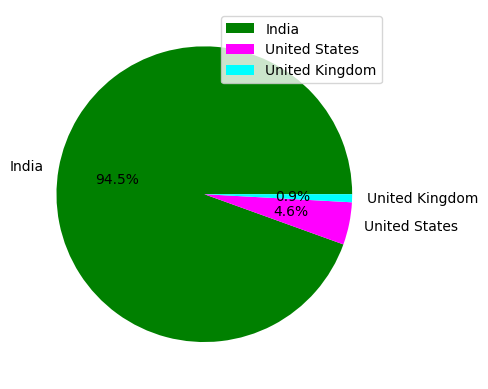

In [252]:
Top_countries = Final_df["Country"].value_counts().head(3)
MyLabels = Top_countries.index
Mycolor = ["Green","Magenta" , "Cyan" ]


plt.pie(Top_countries ,labels= MyLabels ,colors= Mycolor,autopct = "%1.1f%%" )
plt.legend()

plt.show()



As per the analysis above we can see that maximum restaurants are present in "India" totalling for 94.5% followed by "United States" for 4.6% and then "United Kingdom " counting for 0.9% restaurants .

Visualization for Numerical Features

Insight :  How does competition vary across different locations?

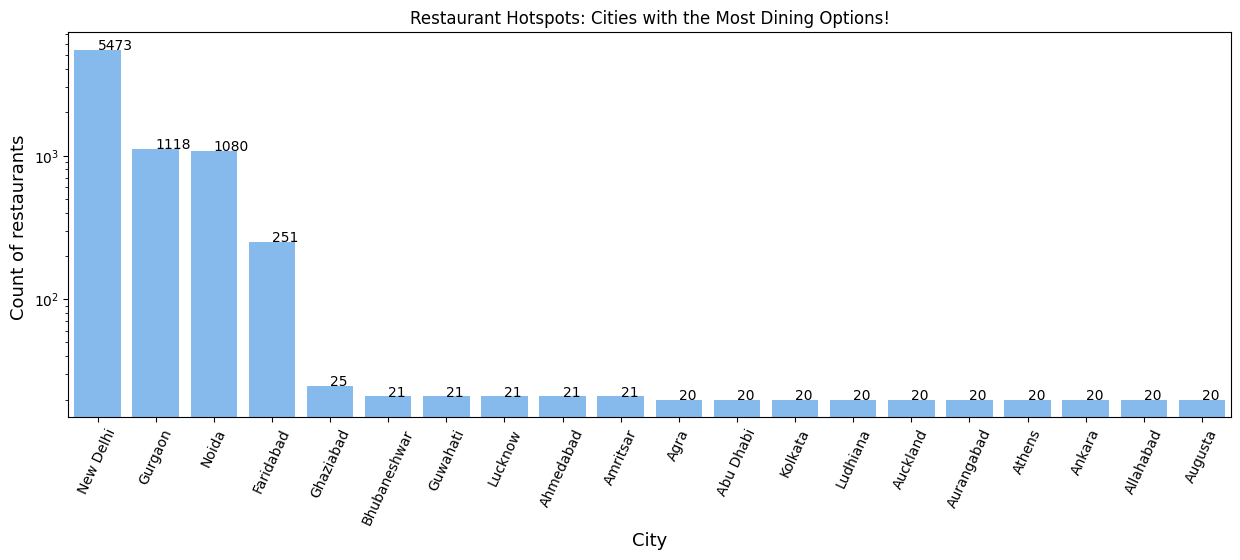

In [253]:
# Selecting the only necessary columns
df_location = Final_df[["Restaurant ID","City","Longitude", "Latitude"]]

# Getting a count of Restaurants per city 
City_count = df_location.groupby("City").count()["Restaurant ID"].reset_index()

# Renaming the column "Restaurant ID" to "Restaurant Count"
City_count.rename(columns={"Restaurant ID":"Restaurant Count"}, inplace= True)

#Displaying top cities with the highest restaurant count
data = City_count.sort_values(by="Restaurant Count" , ascending= False)[:20]

#Visualizing the Restaurant density across cities 
plt.figure(figsize=(15,5))
ax= sns.barplot(data= data ,x ="City" , y = "Restaurant Count", color = "xkcd:sky blue")

#Customizing the graph
plt.title("Restaurant Hotspots: Cities with the Most Dining Options!")
plt.xlabel("City" , fontsize= 13)
plt.ylabel("Count of restaurants " , fontsize= 13)
plt.yscale("log")
plt.xticks(rotation = 65 , fontsize=10)

# Marking the bars in graph 
for p in ax.patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height(), int(p.get_height()))



# Showing the graph 
plt.show()


In [254]:
# Importing the required library 
from folium.plugins import HeatMap

# Creating the heatmap
map_restaurants = folium.Map(location= [df_location['Latitude'].mean(), df_location['Longitude'].mean()], zoom_start= 5)

# Adding  heatmap layer
heat_data = list(zip(df['Latitude'], df['Longitude']))
HeatMap(heat_data, radius=10).add_to(map_restaurants)

# Showing the heatmap 
map_restaurants


- Based on the aforementioned analysis, it is evident that New Delhi hosts the highest concentration of restaurants, amounting to 5,473 establishments. This is followed by Gurgaon and Noida with restaurant counts of 1,118 and 1,080, respectively.
- New Delhi dominates in terms of restaurant count, making it the biggest food hub among the listed cities followed by Gurgaon and Noida.
- The number of restaurants drops drastically after the top three cities.
- Cities towards the right (e.g., Ahmedabad, Agra, Ludhiana, etc.) have very few restaurants (around 20-25).

